# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [1]:
%matplotlib inline
import sap2012
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
s=sap2012.Sap2012()

## Read input file

In [2]:
fp='input_csv_file_low_ins.csv'
s.read_input_csv(fp)

Here this is changed to the three possible options below:

In [3]:
s.inputs['window_u_value']

4.8

# list inputs to adjust values


In [4]:
index_name = ['assumed_occupancy', 'temperature_during_heating_living_room'
             ,'hours_heating_is_off_1_weekday_living_room','hours_heating_is_off_2_weekday_living_room'
             ,'hours_heating_is_off_1_weekend_living_room','hours_heating_is_off_2_weekend_living_room','hours_heating_is_off_1_weekday_rest_of_dwelling','hours_heating_is_off_2_weekday_rest_of_dwelling'
             ,'hours_heating_is_off_1_weekend_rest_of_dwelling','hours_heating_is_off_2_weekend_rest_of_dwelling']

In [5]:
#sample = random.sample(index_name,len(index_name))
#sample

# Generate list of input values for each variable

In [6]:
values = []
for i in range(len(index_name)):
    values.append(s.inputs[index_name[i]])
values
    


[2.73, 21.0, 7.0, 8.0, 0.0, 8.0, 7.0, 8.0, 0.0, 8.0]

In [7]:
value_min = []
for i in range(len(index_name)):
    if (type(values[i])==list):
        calc_list_min = np.array(values[i])
        value_min.append(calc_list_min - 0.01 * calc_list_min)
    else:
        value_min.append(values[i] - 0.01 * values[i])

value_min

[2.7027, 20.79, 6.93, 7.92, 0.0, 7.92, 6.93, 7.92, 0.0, 7.92]

In [8]:
value_max = []
for i in range(len(index_name)):
    if (type(values[i])==list):
        calc_list_max = np.array(values[i])
        value_max.append(calc_list_max + 0.01 * calc_list_max)
    else:
        value_max.append(values[i] + 0.01 * values[i])

value_max

[2.7573, 21.21, 7.07, 8.08, 0.0, 8.08, 7.07, 8.08, 0.0, 8.08]

In [9]:
runs = 4

In [10]:
print (type(s.inputs['area']))

<class 'list'>


In [11]:
print(s.inputs['area'])

[0, 49.95, 48.99]


In [12]:
my_list = s.inputs['area']

In [13]:
my_list

[0, 49.95, 48.99]

# Rearrange values to 

In [14]:
my_list_2 = np.array(s.inputs['area'])
    

In [15]:
my_list_2 * 5 

array([  0.  , 249.75, 244.95])

For each variable, the SAP model is run and the results stored in the `outputs` dictionary:

In [16]:
outputs={} 
total_energy_used_table = {}
for k in range(100):
    value_min = []
    value_max = []
    values = []
    for i in range(len(index_name)):
        values.append(s.inputs[index_name[i]])
        if (type(values[i])==list):
            calc_list_min = np.array(values[i])
            value_min.append(calc_list_min - 0.1 * calc_list_min)
            calc_list_max = np.array(values[i])
            value_max.append(calc_list_max + 0.1 * calc_list_max)
        else:
            value_min.append(values[i] - 0.1 * values[i])
            value_max.append(values[i] + 0.1 * values[i])
        s.inputs[index_name[i]] = random.uniform(value_min[i],value_max[i])
        
    s.run()
    total_energy_used = ([v['total_energy_used'] for v in outputs.values()])
    total_energy_used_table[k]=total_energy_used
    outputs['run%s' % str(k+1)]=s.outputs.copy()# needs copy otherwise the same object is placed in all dictionary items
    s.read_input_csv(fp)  
    output_table = pd.DataFrame(outputs)

    

Plot results

In [17]:
output_table

,run1,run2,run3,run4,run5,run6,run7,run8,run9,run10,...,run91,run92,run93,run94,run95,run96,run97,run98,run99,run100
volume,"[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]",...,"[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]"
total_floor_area,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,...,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94
dwelling_volume,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,...,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562
number_of_chimneys_total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
number_of_chimneys_m3_per_hour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
energy_saving_generation_technologies_total_emissions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total_CO2_emissions_yearly,7648.72,7204.68,6961.14,8468.1,6659.19,7099.83,6551.19,8221.79,7529.19,7233.29,...,7558.63,8747.12,7690.4,7904.6,7521.15,8392.31,6290.86,8208.58,6857.58,6636.92
dwelling_CO2_emission_rate,77.3067,72.8187,70.3572,85.5882,67.3054,71.759,66.2138,83.0988,76.0985,73.1079,...,76.3961,88.4083,77.7279,79.8929,76.0173,84.8223,63.5826,82.9652,69.3105,67.0802
CF,53.1383,50.0534,48.3614,58.8308,46.2637,49.3249,45.5133,57.1196,52.3078,50.2521,...,52.5124,60.7692,53.4278,54.9159,52.252,58.3043,43.7048,57.0278,47.6419,46.1089


In [18]:
total_energy_used=[v['total_energy_used'] for v in outputs.values()]
total_energy_used

[35290.556457758175,
 33262.93358474502,
 32091.31807009558,
 39021.730563855475,
 30741.36478047183,
 32749.988248004378,
 30244.73893767293,
 37905.84165978988,
 34667.33302267214,
 33329.702965551965,
 37986.203064207235,
 28798.845633280514,
 33513.78825269273,
 36669.17039656631,
 38328.942000115814,
 40016.93192706453,
 30851.221787628845,
 32473.80143706472,
 30288.38269351395,
 38557.89021020434,
 37647.02821312794,
 28327.238279594345,
 36781.337730431245,
 31215.37040186028,
 38543.480231838774,
 40069.68845986717,
 37922.277537741975,
 29265.327339840318,
 36779.98783571171,
 27613.65355476152,
 37688.11475707295,
 30512.829855047035,
 35794.62284530604,
 31504.522904399833,
 36986.16770633398,
 35480.1402308812,
 37146.966151823835,
 28694.61524149555,
 31394.987159858767,
 33911.36250409982,
 28775.304763809367,
 37957.13103543513,
 39307.036005671434,
 30750.985214274737,
 32075.17403263287,
 28595.34754527582,
 38930.20678599236,
 34094.53510812873,
 34474.719016858355,


In [19]:
total_CO2_emissions_yearlys=[v['total_CO2_emissions_yearly'] for v in outputs.values()]
total_CO2_emissions_yearlys

[7648.722399820569,
 7204.684345656662,
 6961.136516150146,
 8468.100109833944,
 6659.193380072366,
 7099.8317229877675,
 6551.189939346863,
 8221.793652576675,
 7529.186784676824,
 7233.294134428088,
 8228.728427082893,
 6247.193112022385,
 7261.953273606363,
 7941.271449583487,
 8317.042633918962,
 8674.982149216203,
 6691.841961681416,
 7049.514142638884,
 6580.354150874219,
 8348.357872947048,
 8154.343429054998,
 6156.2138690163665,
 7971.382346602756,
 6777.727884275648,
 8357.806835871565,
 8683.119606760341,
 8225.617042142816,
 6352.319442079437,
 7971.436443002552,
 5985.846607406056,
 8159.656568762623,
 6619.93947412807,
 7755.393536838805,
 6837.369051416635,
 8014.670921127675,
 7690.3288579025175,
 8060.10249668498,
 6216.319651954256,
 6820.212316203962,
 7362.925078853628,
 6245.954967677244,
 8230.322425554312,
 8517.290047217912,
 6681.339876809773,
 6947.64863348299,
 6205.252753499733,
 8435.7589818294,
 7402.762830157917,
 7467.59078888926,
 7103.999191427433,
 65

In [20]:
output = pd.DataFrame(outputs)
output

,run1,run2,run3,run4,run5,run6,run7,run8,run9,run10,...,run91,run92,run93,run94,run95,run96,run97,run98,run99,run100
volume,"[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]",...,"[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]"
total_floor_area,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,...,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94,98.94
dwelling_volume,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,...,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562,227.562
number_of_chimneys_total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
number_of_chimneys_m3_per_hour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
energy_saving_generation_technologies_total_emissions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total_CO2_emissions_yearly,7648.72,7204.68,6961.14,8468.1,6659.19,7099.83,6551.19,8221.79,7529.19,7233.29,...,7558.63,8747.12,7690.4,7904.6,7521.15,8392.31,6290.86,8208.58,6857.58,6636.92
dwelling_CO2_emission_rate,77.3067,72.8187,70.3572,85.5882,67.3054,71.759,66.2138,83.0988,76.0985,73.1079,...,76.3961,88.4083,77.7279,79.8929,76.0173,84.8223,63.5826,82.9652,69.3105,67.0802
CF,53.1383,50.0534,48.3614,58.8308,46.2637,49.3249,45.5133,57.1196,52.3078,50.2521,...,52.5124,60.7692,53.4278,54.9159,52.252,58.3043,43.7048,57.0278,47.6419,46.1089


In [21]:
output.run3['total_energy_used']

32091.31807009558

{'whiskers': [<matplotlib.lines.Line2D at 0x1e923186f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1e92318fe88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e923186988>],
 'medians': [<matplotlib.lines.Line2D at 0x1e923193b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e923193f88>],
 'means': []}

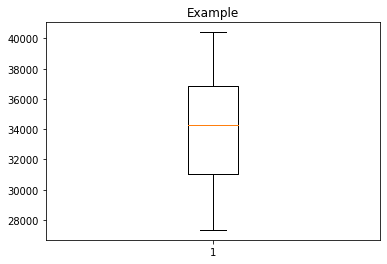

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Example')
ax1.boxplot(total_energy_used)

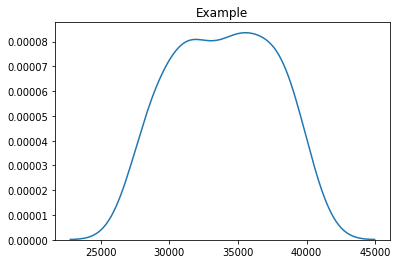

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Example')
sns.distplot(total_energy_used,hist=False)

In [24]:
sp='input_csv_file_high_ins.csv'
s.read_input_csv(sp)

In [25]:
outputs_1={} 
total_energy_used_table_1 = {}
for k in range(100):
    value_min_1 = []
    value_max_1 = []
    values_1 = []
    for i in range(len(index_name)):
        values_1.append(s.inputs[index_name[i]])
        if (type(values_1[i])==list):
            calc_list_min_1 = np.array(values_1[i])
            value_min_1.append(calc_list_min_1 - 0.1 * calc_list_min_1)
            calc_list_max_1 = np.array(values_1[i])
            value_max_1.append(calc_list_max_1 + 0.1 * calc_list_max_1)
        else:
            value_min_1.append(values_1[i] - 0.1 * values_1[i])
            value_max_1.append(values_1[i] + 0.1 * values_1[i])
        s.inputs[index_name[i]] = random.uniform(value_min_1[i],value_max_1[i])
        
    s.run()
    total_energy_used_1 = ([v['total_energy_used'] for v in outputs_1.values()])
    total_energy_used_table_1[k]=total_energy_used_1
    outputs_1['run%s' % str(k+1)]=s.outputs.copy()# needs copy otherwise the same object is placed in all dictionary items
    s.read_input_csv(sp)  
    output_table_1 = pd.DataFrame(outputs)

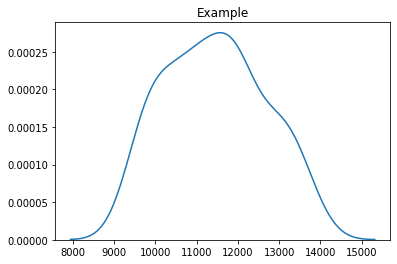

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Example')
sns.distplot(total_energy_used_1,hist=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e923a5e788>,
 'caps': [<matplotlib.lines.Line2D at 0x1e923a6eb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e923a6e348>,
 'medians': [<matplotlib.lines.Line2D at 0x1e923a56848>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e923a72c08>,
 'means': []}

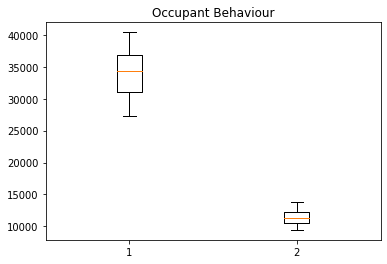

In [30]:
fig1, ax1 = plt.subplots()
ax1.set_title('Occupant Behaviour')
ax1.boxplot([total_energy_used,total_energy_used_1])


In [28]:
writer = pd.ExcelWriter('monte_carlo.xlsx',engine = 'xlsxwriter')

In [29]:
total_energy_used.to_excel(writer,sheet_name = 'low_ins')
total_energy_used_1.to_excel(writer,sheet_name = 'high_ins')

AttributeError: 'list' object has no attribute 'to_excel'